In [1]:
# one-hot-encoding
import pandas as pd
data = pd.read_csv('data/vote.csv', encoding='utf-8')
data.head()

,gender,region,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,1,4,3,3,3,2,2,4.0,1,2
1,1,5,2,3,3,2,4,3.0,0,3
2,1,3,1,2,4,1,3,2.8,1,4
3,2,1,2,1,3,5,4,2.6,1,1
4,1,1,1,2,4,4,3,2.4,1,1


In [2]:
# 범주형 변수 : gender, region
X1 = data[['gender', 'region']]
XY = data[['edu', 'income', 'age', 'score_gov', 'score_progress', 'score_intention', 'vote', 'parties']]

In [4]:
X1['gender'] = X1['gender'].replace([1,2], ['male', 'female'])
X1['region'] = X1['region'].replace([1,2,3,4,5], ['Sudo', 'Chungcheung', 'Honam', 'Youngnam', 'Others'])

C:\Users\yeoga\AppData\Local\Temp/ipykernel_17132/3278034937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['gender'] = X1['gender'].replace([1,2], ['male', 'female'])
C:\Users\yeoga\AppData\Local\Temp/ipykernel_17132/3278034937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['region'] = X1['region'].replace([1,2,3,4,5], ['Sudo', 'Chungcheung', 'Honam', 'Youngnam', 'Others'])


In [6]:
X1_dum = pd.get_dummies(X1)
X1_dum.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam
0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,0
2,0,1,0,1,0,0,0
3,1,0,0,0,0,1,0
4,0,1,0,0,0,1,0


In [7]:
Fvote= pd.concat([X1_dum, XY], axis=1)
Fvote.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [8]:
Fvote.to_csv('data/new-Fvote.csv', index=False, sep=',', encoding='utf-8')

In [12]:
# 데이터셋 분할과 모델검증
# 교차검증과 검증데이터
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
data = pd.read_csv('data/new-Fvote.csv', encoding='utf-8')
data.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [23]:
# 방법1: 특성이름으로 데이터셋 나누기
X=data[['gender_female', 'gender_male', 'region_Chungcheung', 'region_Honam', 'region_Others', 'region_Sudo', 'region_Youngnam', 
        'edu', 'income', 'age', 'score_gov', 'score_progress', 'score_intention']]
# 방법2: 특성 위치값으로 데이터셋 나누기
X=data[data.columns[:13]]
# 방법3: loc함수
X=data.loc[:, 'gender_female':'score_intention']
y=data[['vote']]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)

(158, 13)
(53, 13)


In [27]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print('5개 테스트 셋 정확도:', scores)
print('정확도 평균', scores.mean())

5개 테스트 셋 정확도: [0.71875    0.6875     0.8125     0.58064516 0.80645161]
정확도 평균 0.7211693548387096


In [34]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
score=cross_val_score(model, X_train, y_train, cv=kfold)
print('5개 폴드의 정확도:', scores)

5개 폴드의 정확도: [0.71875    0.6875     0.8125     0.58064516 0.80645161]


In [35]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, random_state=42)
score=cross_val_score(model, X_train, y_train, cv=shuffle_split)
print('교차검증 정확도:',scores)

교차검증 정확도: [0.71875    0.6875     0.8125     0.58064516 0.80645161]


In [41]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, random_state=2)

In [42]:
model.fit(X_train, y_train)
scores=cross_val_score(model, X_train, y_train, cv=5)
print('교차검증 정확도:', scores)
print('정확도 평균:', scores.mean())

교차검증 정확도: [0.58333333 0.66666667 0.70833333 0.65217391 0.65217391]
정확도 평균: 0.652536231884058


In [43]:
model.score(X_valid, y_valid)

0.65

In [44]:
model.score(X_test, y_test)

0.6981132075471698

In [45]:
# 데이터 정규화
import pandas as pd
data = pd.read_csv('data/new-Fvote.csv', encoding='utf-8')
data.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [46]:
data.describe()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.341232,0.658768,0.080569,0.090047,0.094787,0.597156,0.137441,1.867299,2.208531,2.654028,3.056872,3.094787,2.910900,0.710900,2.668246
std,0.475251,0.475251,0.272819,0.286930,0.293617,0.491636,0.345131,0.625963,1.066424,0.872173,0.944451,0.961408,0.725078,0.454422,1.220416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.400000,0.000000,2.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,3.000000,4.000000,4.000000,3.400000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,1.000000,4.000000


array([[<AxesSubplot:title={'center':'gender_female'}>,
        <AxesSubplot:title={'center':'gender_male'}>,
        <AxesSubplot:title={'center':'region_Chungcheung'}>,
        <AxesSubplot:title={'center':'region_Honam'}>],
       [<AxesSubplot:title={'center':'region_Others'}>,
        <AxesSubplot:title={'center':'region_Sudo'}>,
        <AxesSubplot:title={'center':'region_Youngnam'}>,
        <AxesSubplot:title={'center':'edu'}>],
       [<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'score_gov'}>,
        <AxesSubplot:title={'center':'score_progress'}>],
       [<AxesSubplot:title={'center':'score_intention'}>,
        <AxesSubplot:title={'center':'vote'}>,
        <AxesSubplot:title={'center':'parties'}>, <AxesSubplot:>]],
      dtype=object)

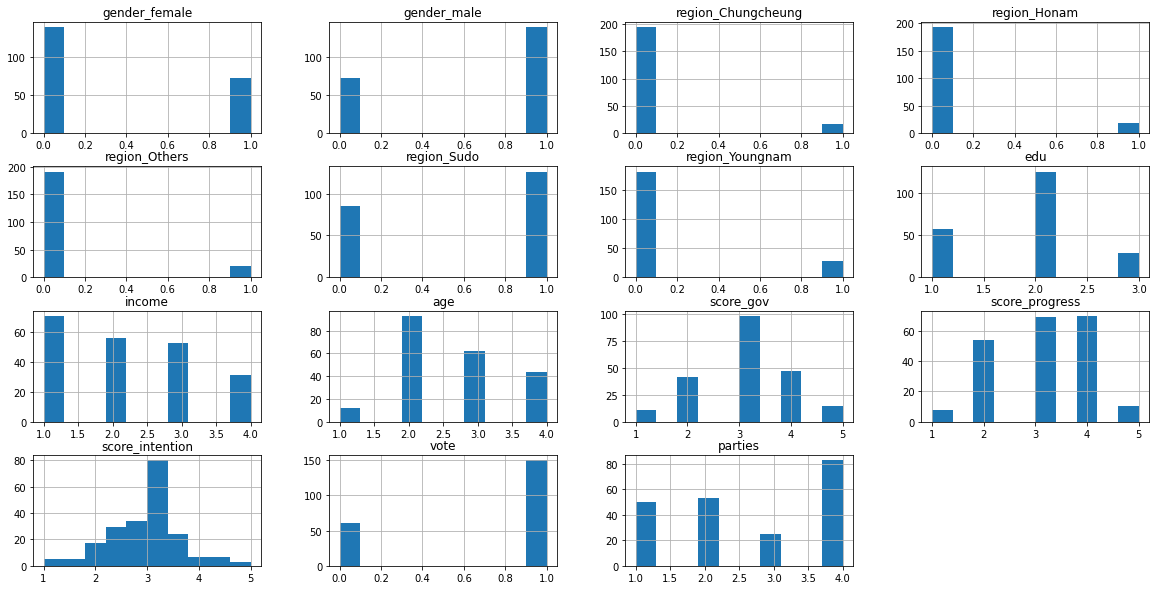

In [47]:
data.hist(figsize=(20,10))

In [48]:
X=data.loc[:, 'gender_female':'score_intention']
y=data[['vote']]

In [50]:
print(X.shape)
print(y.shape)

(211, 13)
(211, 1)


In [51]:
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
print(y_train.mean())
print(y_test.mean())

vote    0.708861
dtype: float64
vote    0.716981
dtype: float64


In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()

In [55]:
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)

In [57]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.322785,0.677215,0.094937,0.056962,0.101266,0.601266,0.145570,0.436709,0.392405,0.554852,0.507911,0.518987,0.477532
std,0.469028,0.469028,0.294060,0.232507,0.302640,0.491195,0.353796,0.312857,0.355960,0.295306,0.235099,0.245248,0.187215
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.312500,0.250000,0.350000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.333333,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.666667,0.666667,0.750000,0.750000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
X_scaled_minmax_test = scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.396226,0.603774,0.037736,0.188679,0.075472,0.584906,0.113208,0.424528,0.433962,0.540881,0.533019,0.537736,0.478302
std,0.493793,0.493793,0.192380,0.394998,0.266679,0.497454,0.319878,0.316170,0.355572,0.279089,0.240381,0.226789,0.163939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.500000,0.500000,0.350000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.333333,0.666667,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.666667,0.666667,0.750000,0.750000,0.550000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.900000


In [59]:
# Standardization 스케일링
# 평균이 0, 표준편차가 1이 되도록 특성치(X)의 단위를 정규화
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()

In [60]:
scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)

In [61]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.322785,0.677215,0.094937,0.056962,0.101266,0.601266,0.145570,0.436709,0.392405,0.554852,0.507911,0.518987,0.477532
std,0.469028,0.469028,0.294060,0.232507,0.302640,0.491195,0.353796,0.312857,0.355960,0.295306,0.235099,0.245248,0.187215
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.312500,0.250000,0.350000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.333333,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.666667,0.666667,0.750000,0.750000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
X_scaled_standard_test = scaler_standard.transform(X_test)

In [63]:
# 모델 학습
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [64]:
model.fit(X_scaled_minmax_train, y_train)
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.7278481012658228

In [66]:
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

0.7169811320754716

In [67]:
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
confusion_train

array([[  9,  37],
       [  6, 106]], dtype=int64)

In [68]:
confustion_test = confusion_matrix(y_test, pred_test)
confustion_test

array([[ 2, 13],
       [ 2, 36]], dtype=int64)

In [70]:
model.fit(X_scaled_minmax_train, y_train)
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.7278481012658228